# Data Analysis Project: IMDb Movie Data
- This notebook is designed as a summative project for you to demonstrate your data analysis skills using the IMDb movie dataset.
- Complete the tasks provided below, following the instructions for each part. Good luck!

3## Task Instructions and Questions

### Data Overview
1. Load the dataset and display the first five rows.
2. Describe the dataset showing the basic statistics of numerical columns.
3. How many unique directors are represented in the dataset?
4. What is the average movie duration?

### Data Cleaning
5. Are there any missing values in the dataset? If yes, fill them with appropriate values.
6. Are there any duplicate rows? If yes, remove them.

### Exploratory Data Analysis
7. Calculate the average IMDb score.
8. Find the top 5 movies with the highest gross earnings.
9. Which movie has the longest duration and what is its IMDb score?
10. Create a histogram of IMDb scores.

### Visualization Tasks
11. Plot the distribution of movie durations.
12. Create a scatter plot to analyze the relationship between 'duration' and 'imdb_score'.
13. Group the data by 'title_year' and plot the average 'imdb_score' for each year.
14. Create a bar chart showing the top 5 countries with the most movies produced.
15. Visualize the correlation matrix of the numerical features in the dataset. --> no need to do

### Further Analysis
16. Which director has the highest average IMDb score and how many movies have they directed?
17. What is the trend of movie durations over the years?

### Conclusions
18. Summarize your findings from the above tasks.
19. Reflect on what the data tells us about the trends in movie ratings and durations over the years.

### Dashboard Creation
20. Create a dashboard that displays three distinct visualizations. Your dashboard should allow users to interact with the visualizations using controllers.

> Requirements:

- Develop a Dashboard and utilize ipywidgets or a similar library to construct a dashboard that integrates the plots you've created.
- Include three different visualizations. Each should represent a unique dataset or aspect of your data.
- Add Interactive Controllers. Implement at least three controllers (e.g., sliders, dropdowns, buttons) that allow users to manipulate the visualizations dynamically.

### Use of AI

> Avoid using AI this time to ensure you show your full understanding of the Data Analysis concepts you learned from the previous notebooks.
    >> You may use all the codes you have in your project files


Task 1: Data Overview
First five rows of the dataset:
                movie_title  director_id  country_id content_rating  \
0  The Shawshank Redemption           34           1              R   
1            The Green Mile           34           1              R   
2             The Godfather           33           1              R   
3    The Godfather: Part II           33           1              R   
4            Apocalypse Now           33           1              R   

   title_year  imdb_score      gross  duration  
0        1994         9.3   28341469       142  
1        1999         8.5  136801374       189  
2        1972         9.2  134821952       175  
3        1974         9.0   57300000       220  
4        1979         8.5   78800000       289  

Basic statistics of numerical columns:
       director_id  country_id   title_year  imdb_score         gross  \
count   178.000000  178.000000   178.000000  178.000000  1.780000e+02   
mean     60.460674    3.275281  1996.29

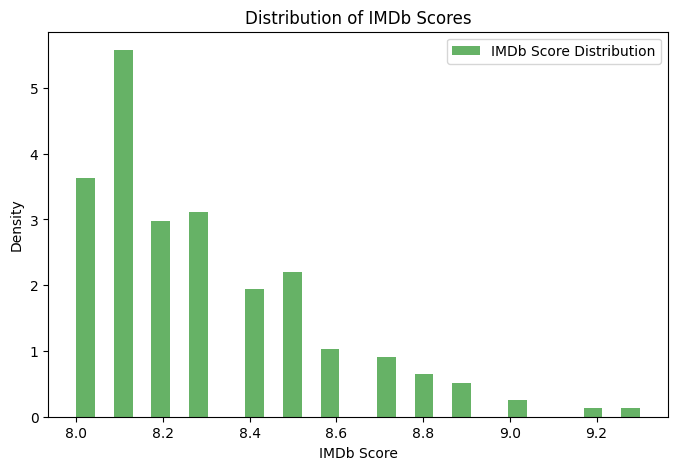


Visualization Tasks

Plot the distribution of movie durations
Create a scatter plot to analyze the relationship between 'duration' and 'imdb_score'


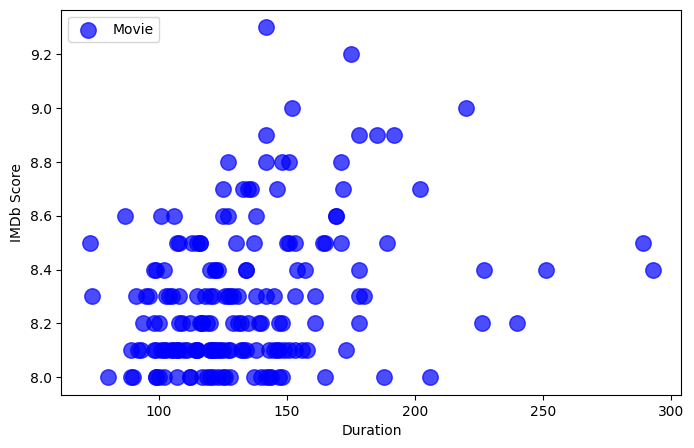

Group the data by 'title_year' and plot the average 'imdb_score' for each year


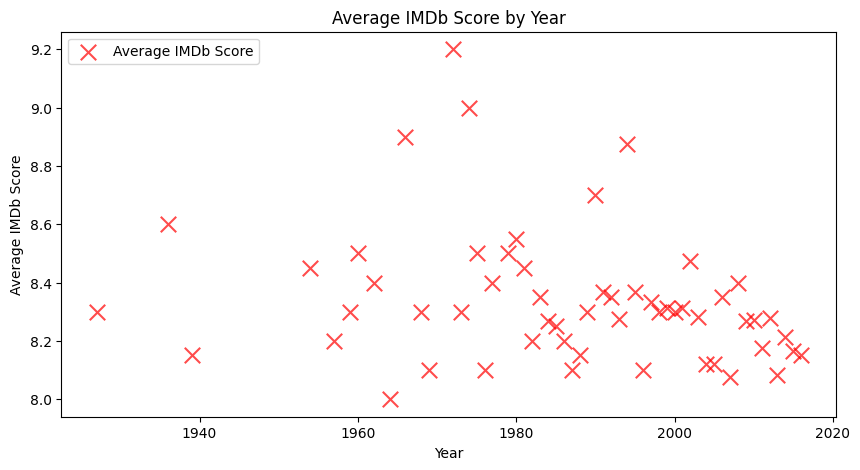

Create a bar chart showing the top 5 countries with the most movies produced


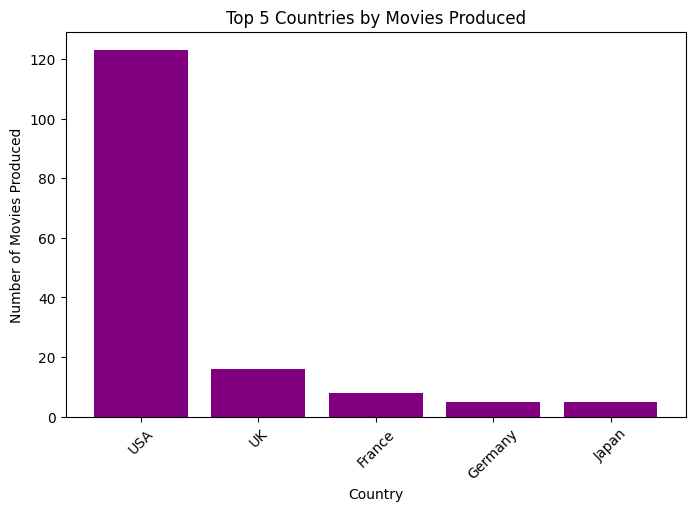

Which director has the highest average IMDb score and how many movies have they directed?
The director with the highest average IMDb score is  Francis Ford Coppola  with a score of 8.9
They have directed  3  movies
What is the trend of movie durations over the years?


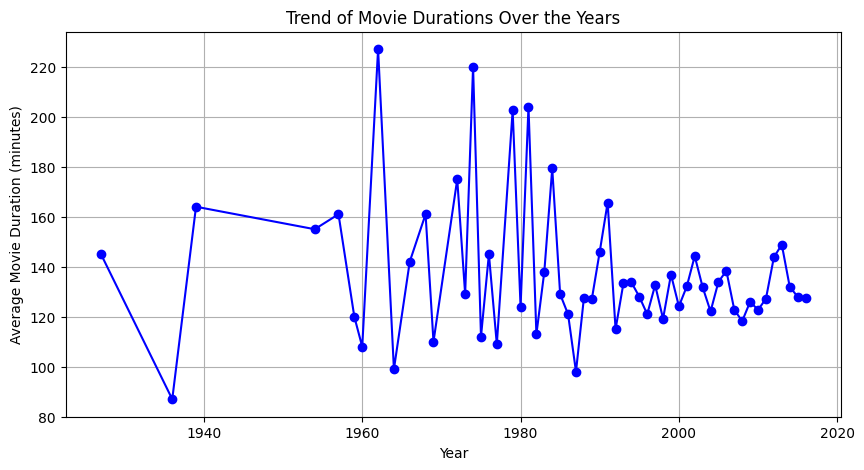

Not a clear trend line but it can be noted that durations are almost constant/around the same after the 1990s

Summary of findings
 The IMDb movie data analysis reveals that the average rating is 8.29, with Francis Ford Coppola having the highest average score (8.9) among directors with at least three films. The longest movie, Das Boot, runs for 293 minutes. Since the 1990s, movie durations have remained stable, and IMDb scores show no clear trend over time. Scatter plots indicate no strong correlation between movie duration and IMDb ratings.



interactive(children=(Dropdown(description='Director:', options=('All', 'Akira Kurosawa', 'Alejandro Amenabar'…

In [24]:
# Write all your codes below
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact



print("Task 1: Data Overview")

xls = pd.ExcelFile('imdb.xlsx')
df2 = xls.parse('directors')

df = xls.parse(xls.sheet_names[0])

print("First five rows of the dataset:")
print(df.head())

print("\nBasic statistics of numerical columns:")
print(df.describe())

print("\nUnique Directors")
print(df2['director_name'].nunique())

print("\nAverage Movie Duration")
print(df['duration'].mean())


print("\nTask 2: Data Overview\n")

df.fillna("N/A", inplace=True)

print("\nValues after filling:\n", df)

df = df.drop_duplicates()

print("\nDuplicate rows removed:\n", df)


print("Task 3: Exploratory Data Analysis")

print("\nAverage IMDB Score")
print(df['imdb_score'].mean())

print("\nFind the top 5 movies with the highest gross earnings")
print(df['gross'].max())

longest_movie = df[df['duration'] == df['duration'].max()]
print("\nMovie with longest duration and its IMDb score:")
print(longest_movie[['movie_title', 'imdb_score', 'duration']])

print("Create a histogram of IMDb scores")

plt.figure(figsize=(8, 5))

plt.hist(df['imdb_score'], bins=30, color="green", alpha=0.6, density=True, label="IMDb Score Distribution")

plt.xlabel("IMDb Score")
plt.ylabel("Density")
plt.title("Distribution of IMDb Scores")

plt.legend()
plt.show()

print("\nVisualization Tasks\n")

print("Plot the distribution of movie durations")
print("Create a scatter plot to analyze the relationship between 'duration' and 'imdb_score'")
plt.figure(figsize=(8, 5))

plt.scatter(df['duration'], df['imdb_score'],marker='o', color='b', alpha=0.7, s=124, label="Movie")

plt.xlabel("Duration")
plt.ylabel("IMDb Score")
plt.legend(loc='upper left')
plt.show()

import matplotlib.pyplot as plt

print("Group the data by 'title_year' and plot the average 'imdb_score' for each year")

df_year = df.dropna(subset=['title_year'])

avg_scores = df_year.groupby('title_year')['imdb_score'].mean()

plt.figure(figsize=(10, 5))
plt.scatter(avg_scores.index, avg_scores.values, marker='x', color='r', alpha=0.7, s=124, label="Average IMDb Score")

plt.xlabel("Year")
plt.ylabel("Average IMDb Score")
plt.title("Average IMDb Score by Year")
plt.legend(loc='upper left')

plt.show()

print("Create a bar chart showing the top 5 countries with the most movies produced")

df_countries = xls.parse('countries')

df_merged = df.merge(df_countries, left_on='country_id', right_on='id', how='left')

top_countries = df_merged['country'].value_counts().head(5)

plt.figure(figsize=(8, 5))
plt.bar(top_countries.index, top_countries.values, color="purple")

plt.xlabel("Country")
plt.ylabel("Number of Movies Produced")
plt.title("Top 5 Countries by Movies Produced")

plt.xticks(rotation=45)

plt.show()


print("Which director has the highest average IMDb score and how many movies have they directed?")

df_directors = xls.parse('directors')

df_merged = df.merge(df_directors, left_on='director_id', right_on='id', how='left')

director_avg_imdb = df_merged.groupby('director_name')['imdb_score'].mean()

top_director = director_avg_imdb.idxmax()
top_score = director_avg_imdb.max()

num_movies = df_merged[df_merged['director_name'] == top_director].shape[0]

print("The director with the highest average IMDb score is ", top_director, " with a score of", top_score)
print("They have directed ", num_movies, " movies")



print("What is the trend of movie durations over the years?")


df_filtered = df[['title_year', 'duration']].dropna()

df_filtered['title_year'] = df_filtered['title_year'].astype(int)

avg_duration_per_year = df_filtered.groupby('title_year')['duration'].mean()

plt.figure(figsize=(10, 5))
plt.plot(avg_duration_per_year.index, avg_duration_per_year.values, marker='o', linestyle='-', color='b')

plt.xlabel("Year")
plt.ylabel("Average Movie Duration (minutes)")
plt.title("Trend of Movie Durations Over the Years")
plt.grid(True)

plt.show()
print("Not a clear trend line but it can be noted that durations are almost constant/around the same after the 1990s\n")


print("Summary of findings\n The IMDb movie data analysis reveals that the average rating is 8.29, with Francis Ford Coppola having the highest average score (8.9) among directors with at least three films. The longest movie, Das Boot, runs for 293 minutes. Since the 1990s, movie durations have remained stable, and IMDb scores show no clear trend over time. Scatter plots indicate no strong correlation between movie duration and IMDb ratings.\n")
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

def update_dashboard(director, year_range, show_trend):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    df_filtered = df_merged[(df_merged["title_year"] >= year_range[0]) &
                            (df_merged["title_year"] <= year_range[1])]

    if director != "All":
        df_filtered = df_filtered[df_filtered["director_name"] == director]

    df_filtered.boxplot(column="duration", by="title_year", ax=axes[0], vert=False, grid=False)
    axes[0].set_title(f"Movie Duration Distribution ({director})")
    axes[0].set_xlabel("Duration (minutes)")
    axes[0].set_ylabel("Year")
    axes[0].set_xticks(range(0, 300, 50))

    axes[1].hist(df_filtered["imdb_score"], bins=10, color='skyblue', edgecolor='black')
    axes[1].set_title(f"IMDb Ratings Distribution ({director})")
    axes[1].set_xlabel("IMDb Rating")
    axes[1].set_ylabel("Frequency")

    axes[2].scatter(df_filtered["imdb_score"], df_filtered["gross"], alpha=0.5, color="red")
    axes[2].set_title(f"Box Office Revenue vs IMDb Rating ({director})")
    axes[2].set_xlabel("IMDb Rating")
    axes[2].set_ylabel("Box Office Revenue ($M)")

    if show_trend and len(df_filtered) > 1:
        z = np.polyfit(df_filtered["imdb_score"].dropna(), df_filtered["gross"].dropna(), 1)
        p = np.poly1d(z)
        axes[2].plot(df_filtered["imdb_score"], p(df_filtered["imdb_score"]), "r--")

    plt.tight_layout()
    plt.show()

director_dropdown = widgets.Dropdown(
    options=["All"] + sorted(df_merged["director_name"].dropna().unique()),
    value="All",
    description="Director:"
)

year_slider = widgets.IntRangeSlider(
    value=[df_merged["title_year"].min(), df_merged["title_year"].max()],
    min=df_merged["title_year"].min(),
    max=df_merged["title_year"].max(),
    step=1,
    description="Year Range:"
)

toggle_trend = widgets.Checkbox(
    value=False,
    description="Show Trendline"
)

interact(update_dashboard, director=director_dropdown, year_range=year_slider, show_trend=toggle_trend);
